In [169]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [145]:
df = pd.read_csv('./data/kaggle_neo.csv')

|  Group  |  Definition  |  Description  |
|:--------|:------------:|:--------------|
| NECs    | q<1.3au, P<200yrs  |  Near-Earth Comets |
| NEAs    | q<1.3au     |  Near-Earth Asteroids |
| Atiras | a<1.0 au, Q<0.983 au | NEAs whose orbits are contained entirely with the orbit of the Earth (named after asteroid 163693 Atira) |
| Atens  | a<1.0 au, Q>0.983 au | Earth-crossing NEAs with semi-major axes smaller than Earth's (named after asteroid 2062 Aten) |
| Apollos | a>1.0 au, q<1.017 au | Earth-crossing NEAs with semi-major axes larger than Earth's (named after asteroid 1862 Apollo) |
| Amors  | a>1.0 au, 1.017<q<1.3 au | Earth-approaching NEA's with orbits exterior to Earth's but interior to Mars' ( named aftger asteroid 1221 Amor) |
| PHAs   | MOID<=0.05 au, H<=22.0  | Potentially Hazardous Asteroids: NEAs whose minimum Orbit Interestion Distance (MOID) with the Earth is 0.05 au or less and whose absolute magnitude (H) is 22.0 or brighter |  

(q = perihelion distance, Q = aphelion distance, a = semi-major axis)


-   **Designation**     : Designation of NEO object
-   **Discovery Date**  : Date of Discovery
-   **H (mag)**         : Absolute Magnitude
-   **MOID (au)**       : Minimum Orbit Intersection Distance with Earth
-   **q (au)**          : perihelion distance
-   **Q (au)**          : aphelion distance
-   **period (yr)**     : Orbital Period (one full rotation)
-   **i (deg)**         : Orbital Inclination, tilt of orbital plane relative to earch in degrees
-   **PHA**             : Potentially hazardous (target variable)
-   **Orbit Class**     : Near Earth orbital class *

### Exploratory analysis

* Primary: to classify if an object is hazardous or not  
* Secondary: classify the group  

In [146]:
df.describe()

,H (mag),MOID (au),q (au),Q (au),period (yr),i (deg)
count,398.000000,432.000000,432.000000,430.000000,4.300000e+02,432.000000
mean,22.938467,0.321176,1.087176,896.216837,1.664547e+05,27.161806
std,13.697327,0.576055,0.628169,16383.291931,3.363227e+06,24.992035
min,15.450000,0.000300,0.120000,1.020000,5.300000e-01,0.820000
25%,19.500000,0.052000,0.790000,2.332500,2.185000e+00,13.890000
50%,20.485000,0.155000,0.990000,3.595000,3.505000e+00,21.980000
75%,21.597500,0.292250,1.160000,4.587500,4.630000e+00,30.017500
max,99.990000,6.373000,7.150000,338831.510000,6.973342e+07,162.300000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Designation                  432 non-null    object 
 1   Discovery Date (YYYY-MM-DD)  432 non-null    object 
 2   H (mag)                      398 non-null    float64
 3   MOID (au)                    432 non-null    float64
 4   q (au)                       432 non-null    float64
 5   Q (au)                       430 non-null    float64
 6   period (yr)                  430 non-null    float64
 7   i (deg)                      432 non-null    float64
 8   PHA                          398 non-null    object 
 9   Orbit Class                  432 non-null    object 
dtypes: float64(6), object(4)
memory usage: 33.9+ KB


In [148]:
df.isna().sum()

Designation                     0
Discovery Date (YYYY-MM-DD)     0
H (mag)                        34
MOID (au)                       0
q (au)                          0
Q (au)                          2
period (yr)                     2
i (deg)                         0
PHA                            34
Orbit Class                     0
dtype: int64

-   **Designation**     : Designation of NEO object
-   **Discovery Date**  : Date of Discovery
-   **H (mag)**         : Absolute Magnitude
-   **MOID (au)**       : Minimum Orbit Intersection Distance with Earth
-   **q (au)**          : perihelion distance
-   **Q (au)**          : aphelion distance
-   **period (yr)**     : Orbital Period (one full rotation)
-   **i (deg)**         : Orbital Inclination, tilt of orbital plane relative to earch in degrees
-   **PHA**             : Potentially hazardous (target variable)
-   **Orbit Class**     : Near Earth orbital class *

In [149]:
not_na_df =df[df['PHA'].notna()]
not_na_df

,Designation,Discovery Date (YYYY-MM-DD),H (mag),MOID (au),q (au),Q (au),period (yr),i (deg),PHA,Orbit Class
0,(2024 FL4),2024-03-31,21.61,0.094,1.07,3.77,3.76,15.59,N,Amor
1,(2024 ET5),2024-03-14,20.68,0.235,1.16,4.23,4.42,15.23,N,Amor
2,(2024 EO2),2024-03-01,19.08,0.192,1.19,4.55,4.86,54.74,N,Amor
3,(2024 AP7),2024-01-15,19.79,0.224,0.59,2.91,2.31,24.54,N,Apollo
4,(2024 AF6),2024-01-13,20.67,0.134,0.43,1.02,0.62,15.05,N,Aten
...,...,...,...,...,...,...,...,...,...,...
427,(2010 BV132),2010-01-16,21.48,0.023,1.01,1.45,1.36,17.28,Y,Apollo
428,(2010 AG79),2010-01-13,20.04,0.232,1.21,4.58,4.93,33.03,N,Amor
429,614599 (2010 AB78),2010-01-12,18.31,0.208,1.03,3.49,3.39,33.27,N,Amor
430,(2010 AZ85),2010-01-08,21.61,0.685,1.60,2.53,2.96,19.88,N,Mars-crossing Asteroid


In [150]:
na_df = df[df['PHA'].isna()]
na_df


,Designation,Discovery Date (YYYY-MM-DD),H (mag),MOID (au),q (au),Q (au),period (yr),i (deg),PHA,Orbit Class
52,C/2020 P1 (NEOWISE),2020-08-02,NaN,0.643,0.34,NaN,NaN,45.05,NaN,Hyperbolic Comet
59,C/2020 F3 (NEOWISE),2020-03-27,NaN,0.363,0.29,716.64,6787.09,128.94,NaN,Comet
69,C/2019 L2 (NEOWISE),2019-06-11,NaN,0.636,1.62,49.66,129.85,152.19,NaN,Halley-type Comet*
75,C/2019 H1 (NEOWISE),2019-04-18,NaN,0.865,1.84,470.82,3633.22,104.58,NaN,Comet
91,C/2018 N1 (NEOWISE),2018-07-02,NaN,0.292,1.31,842.62,8668.07,159.44,NaN,Comet
98,C/2018 EN4 (NEOWISE),2018-03-09,NaN,0.568,1.45,35.40,79.09,81.56,NaN,Halley-type Comet*
123,C/2017 C1 (NEOWISE),2017-02-06,NaN,0.914,1.50,40.11,94.89,65.75,NaN,Halley-type Comet*
137,C/2016 U1 (NEOWISE),2016-10-21,NaN,0.589,0.32,NaN,NaN,46.43,NaN,Hyperbolic Comet
153,C/2016 C2 (NEOWISE),2016-02-08,NaN,0.632,1.56,126.48,512.23,38.16,NaN,Comet
156,C/2016 B1 (NEOWISE),2016-01-17,NaN,2.201,3.21,839.95,8656.16,50.48,NaN,Comet


H I think will be more important to the grouping but not hazerdous...well maybe if it's large enough.. PHA is what would need to be found. to PHA is the target. 

In [151]:
not_na_df[not_na_df['Designation'].str.contains('NEOWISE')]

,Designation,Discovery Date (YYYY-MM-DD),H (mag),MOID (au),q (au),Q (au),period (yr),i (deg),PHA,Orbit Class


Okay looks like the NEOWISE findings are all missing H and PHA. I can still attempt to see if we can use these to predict the PHA w/o the H. Initial trainings we can see how well it performs without that variable

In [152]:
not_na_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 431
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Designation                  398 non-null    object 
 1   Discovery Date (YYYY-MM-DD)  398 non-null    object 
 2   H (mag)                      398 non-null    float64
 3   MOID (au)                    398 non-null    float64
 4   q (au)                       398 non-null    float64
 5   Q (au)                       398 non-null    float64
 6   period (yr)                  398 non-null    float64
 7   i (deg)                      398 non-null    float64
 8   PHA                          398 non-null    object 
 9   Orbit Class                  398 non-null    object 
dtypes: float64(6), object(4)
memory usage: 34.2+ KB


okay we know  Potentially Hazardous Asteroids: NEAs whose minimum Orbit Interestion Distance (MOID) with the Earth is 0.05 au or less and whose absolute magnitude (H) is 22.0 or brighter. can the other features find this 

In [153]:
# how many are hazardous
haz = not_na_df[not_na_df['PHA']=='Y'].count()
not_haz = not_na_df[not_na_df['PHA']=='N'].count()
print(haz)
print(not_haz)

Designation                    66
Discovery Date (YYYY-MM-DD)    66
H (mag)                        66
MOID (au)                      66
q (au)                         66
Q (au)                         66
period (yr)                    66
i (deg)                        66
PHA                            66
Orbit Class                    66
dtype: int64
Designation                    332
Discovery Date (YYYY-MM-DD)    332
H (mag)                        332
MOID (au)                      332
q (au)                         332
Q (au)                         332
period (yr)                    332
i (deg)                        332
PHA                            332
Orbit Class                    332
dtype: int64


In [154]:
filtered_set = not_na_df.drop(columns='Discovery Date (YYYY-MM-DD)') #data just taking up space
filtered_set.columns

Index(['Designation', 'H (mag)', 'MOID (au)', 'q (au)', 'Q (au)',
       'period (yr)', 'i (deg)', 'PHA', 'Orbit Class'],
      dtype='object')

In [155]:
# lower column names and remove spaces
filtered_set.columns = [col.replace(' ', '_') for col in filtered_set.columns]

In [156]:
filtered_set['binary_PHA'] = pd.get_dummies(filtered_set['PHA'], dtype=int)['Y']


In [185]:
dups = filtered_set.pivot_table(index='Designation', aggfunc='size')
dups

Designation
(2010 AG79)            1
(2010 BO127)           1
(2010 BV132)           1
(2010 CA55)            1
(2010 CC55)            1
                      ..
832994 (2010 GW62)     1
833009 (2010 GR75)     1
833459 (2010 JM151)    1
838181 (2014 CF14)     1
841631 (2015 OS35)     1
Length: 363, dtype: int64

In [157]:
filtered_set.columns

Index(['Designation', 'H_(mag)', 'MOID_(au)', 'q_(au)', 'Q_(au)',
       'period_(yr)', 'i_(deg)', 'PHA', 'Orbit_Class', 'binary_PHA'],
      dtype='object')

In [158]:
filtered_set['Orbit_Class'].unique()

array(['Amor', 'Apollo', 'Aten', 'Mars-crossing Asteroid',
       'Main-belt Asteroid', 'Outer Main-belt Asteroid', 'Centaur'],
      dtype=object)

In [159]:
haz = filtered_set[filtered_set['PHA']=='Y']
non_haz = filtered_set[filtered_set['PHA']=='N']
targets = filtered_set.PHA


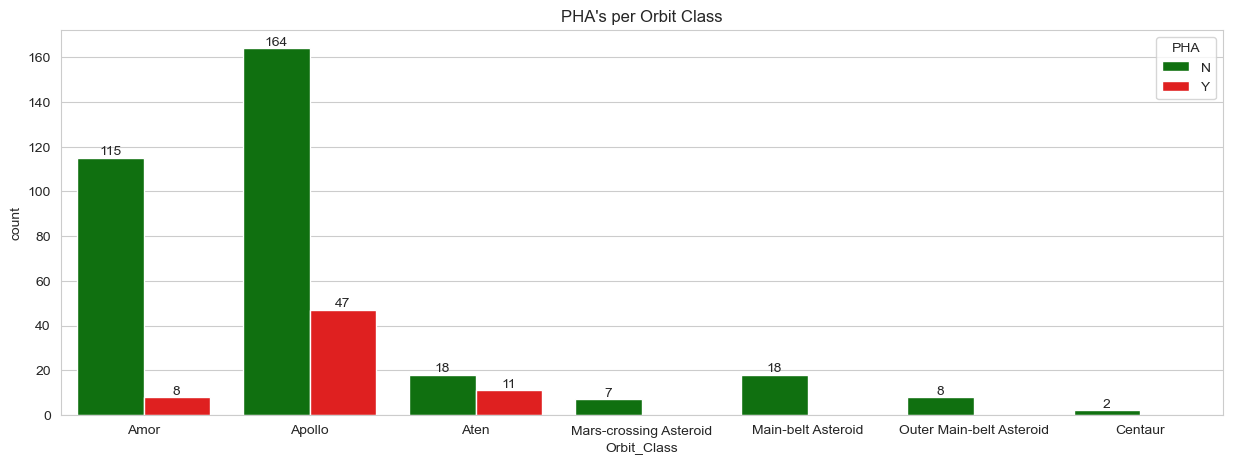

In [160]:

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(filtered_set, x='Orbit_Class', hue='PHA', palette=['green', 'red'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("PHA's per Orbit Class")
plt.show()


Aight we can see for the classes at least that Amor Apollo, and Aten only have hazardous. Might actually need more data

In [161]:
filtered_set = filtered_set[filtered_set['Orbit_Class'].isin(['Amor', 'Apollo', 'Aten'])].copy()

i want the x-axis: semi_major (a) seperate inner (Atira/Aten) and Outer (Apollo/Amor) Orbits
and the y-axis (e) orbital elongation to reveal whethere the orbit crosses Earth's path

In [162]:
filtered_set['a'] = (filtered_set['Q_(au)'] + filtered_set['q_(au)'])/2
filtered_set['e'] = (filtered_set['Q_(au)'] - filtered_set['q_(au)']) / (filtered_set['Q_(au)'] + filtered_set['q_(au)'])
filtered_set.columns

Index(['Designation', 'H_(mag)', 'MOID_(au)', 'q_(au)', 'Q_(au)',
       'period_(yr)', 'i_(deg)', 'PHA', 'Orbit_Class', 'binary_PHA', 'a', 'e'],
      dtype='object')

In [163]:
filtered_set[['a','e']].head()

,a,e
0,2.420,0.557851
1,2.695,0.569573
2,2.870,0.585366
3,1.750,0.662857
4,0.725,0.406897


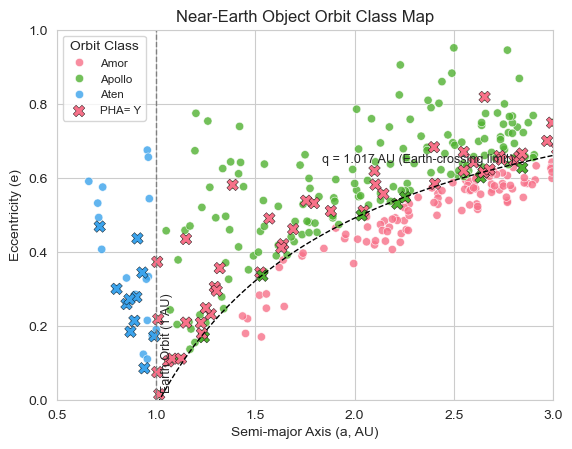

In [ ]:
palette = sns.color_palette("husl", filtered_set["Orbit_Class"].nunique())
sns.scatterplot(
    data=filtered_set,
    x='a', y='e',
    hue='Orbit_Class',
    palette=palette,
    alpha=0.8,
    legend='full'
)

#need an overlay x isn't showing properly
sns.scatterplot(
    data=filtered_set[filtered_set['PHA']=='Y'],
    x='a', y='e',
    s=70,
    marker='X',
    hue= 'Orbit_Class',
    palette=palette,
    label='PHA= Y',
    legend=False,
    edgecolor='black',
    linewidth=0.3
)

# Earth orbit reference
plt.axvline(1, color='gray', linestyle='--', linewidth=1)
plt.text(1.02, 0.02, "Earth Orbit (1 AU)", rotation=90, va='bottom', ha='left', fontsize=9)

# q = 1.017 AU boundary curve
a_line = np.linspace(0.5, 3, 300)
e_line = 1 - 1.017 / a_line
plt.plot(a_line, e_line, color='black', linestyle='--', linewidth=1)
plt.text(2.8, 0.65, "q = 1.017 AU (Earth-crossing limit)", ha='right', va='center', fontsize=9)

# Labels and limits
plt.xlabel("Semi-major Axis (a, AU)")
plt.ylabel("Eccentricity (e)")
plt.title("Near-Earth Object Orbit Class Map")
plt.xlim(0.5, 3)
plt.ylim(0, 1)
plt.legend(title="Orbit Class", fontsize='small')
plt.show()



I kinda feel changing to which orbital features correlate with hazardous classification or we get more time series. It occured to me that this data represents steady state orbits where yeah we can use like a knn to classify, but to determin if something WILL BECOME hazardous we need more data. 